In [5]:
#imports
import control.matlab as c
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Define Transfer Function

s = c.tf([1,0], [1])
H = c.TransferFunction([10], [1, 2, 5]) * c.TransferFunction([1], [1, 5])

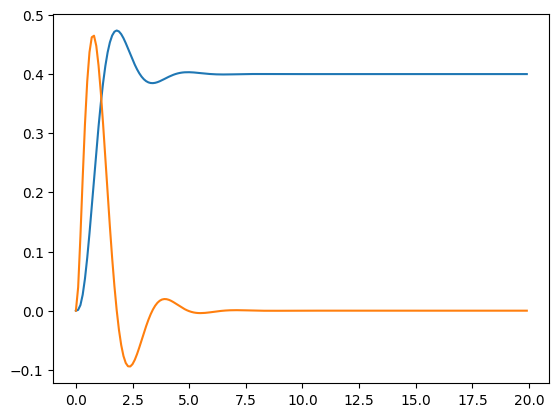

In [8]:
#Create time vector 
t= np.arange(0, 20, 0.1)

y1, t = c.step(H, t)
y2, t = c.impulse(H, t)
#https://python-control.readthedocs.io/en/latest/generated/control.matlab.step.html
#Can also return multiple outputs, you can either specify them in the function, or name the arrays accordingly when calling the function 
plt.plot(t, y1, t, y2)
plt.show()

If you have an arbitrary input vector u, then use the function lsim instead

C:\Users\kaspe\AppData\Roaming\Python\Python310\site-packages\control\timeresp.py:935: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


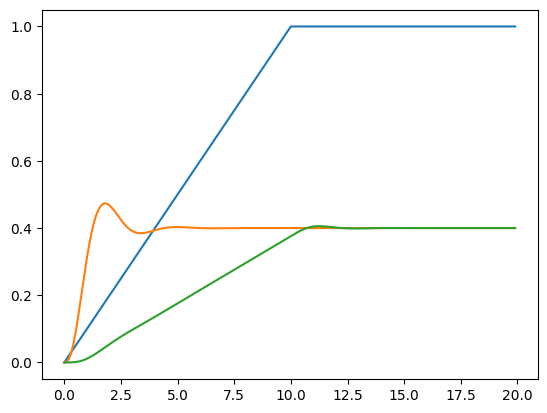

In [9]:
u = np.minimum(0.1*t, 1.0)
y1, t = c.step(H, t)
y2, t, x = c.lsim(H, u, t)
#https://python-control.readthedocs.io/en/latest/generated/control.matlab.lsim.html

plt.plot(t, u, t, y1, t, y2)
plt.show() 
#blue line is input vector, orange is step, green is lsim

Calculating Responses (Overshoot, Delay, etc.)

In [ ]:
#y1 is the matrix with the result

#overshoot in %:
overshoot = (y1.max/y1[-1] - 1)*100

#peak time
tpeak = t[y1.argmax()]

#Settling time
# this determines all values out of +/- 5% band, last one is index of
# settling time. The logical_or figures out which values are either too
# high or too low. This returns a truth matrix, using it as index gives the
# times, and with the [-1] the last one of those times is selected
tsettling = t[np.logical_or(y1 > y1[-1]*1.05, y1 < y1[-1]*0.95)][-1]

# delay time, the time to reach (commonly) 10 % of the final response
tdelay = t[y1 >= 0.1*y1[-1]][0]

# rise time, 10 % to 90 %
trise = t[y1 >= 0.9 * y1[-1]][0] - tdelay


Response to inital condition, use lsim

In [ ]:
y = initial(sys, t, x0)

#https://python-control.readthedocs.io/en/latest/generated/control.matlab.initial.html

#calculates the initial response of the system, 
